# Cursos de Series de tiempo con *Machine Learning*
## Modulo 26. Regresores bayesianos
                        Elaborado por: Naren Castellon

<center><img src="./imagen/bayesian%20regresion.png" width="800" height="500"></center>

<a class="anchor" id="0.1"></a>
# **Table of Contents** 


1.	[Introduction](#1)
2.  [Ventajas y desventajas de Regresión Bayesiana Ridge](#3)
2.	[Regresión Bayesiana Ridge](#2)
4.	[Automatic Relevance Determination - ARD](#4)
5.	[Loading libraries and data](#5)
6.	[Explore Data with the plot method](#6)
7.	[Split the data into training and testing](#7)
8.	[Implementation de modelo](#8)
9.	[Evaluate the model’s performance](#9)
10.	[Evaluate the model](#10)
11. [References](#11)

# **1. Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0)


Regresión bayesiana

Las técnicas de regresión bayesiana se pueden utilizar para incluir parámetros de regularización en el procedimiento de estimación: el parámetro de regularización no se establece en un sentido estricto, sino que se ajusta a los datos disponibles.

Esto se puede hacer introduciendo valores a priori no informativos sobre los hiperparámetros del modelo. La regularización $\ell_{2}$ utilizada en la regresión y clasificación de Ridge es equivalente a encontrar una estimación máxima a posteriori bajo un valor a priori gaussiano sobre los coeficientes $w$ con precisión $\lambda^{-1}$. En lugar de establecer lambda manualmente, es posible tratarlo como una variable aleatoria que se estimará a partir de los datos.

Para obtener un modelo completamente probabilístico, se supone que la salida $y$ tiene una distribución gaussiana alrededor de $X w$:

$$p(y|X,w,\alpha) = \mathcal{N}(y|X w,\alpha^{-1})$$

donde $\alpha$ se trata nuevamente como una variable aleatoria que debe estimarse a partir de los datos.

## Las ventajas de la regresión bayesiana son:

- Se adapta a los datos disponibles.
- Se puede utilizar para incluir parámetros de regularización en el procedimiento de estimación.

## Las desventajas de la regresión bayesiana incluyen:

- La inferencia del modelo puede llevar mucho tiempo.

# **2. Regresión Bayesiana Ridge** <a class="anchor" id="2"></a>

`BayesianRidge` estima un modelo probabilístico del problema de regresión como se describió anteriormente. La distribución previa para el coeficiente $w$ se da mediante una gaussiana esférica:

$$p(w|\lambda) =
\mathcal{N}(w|0,\lambda^{-1}\mathbf{I}_{p}) $$

Las distribuciones a priori sobre $\alpha$ y $\gamma$ se eligen para que sean distribuciones gamma, la distribución a priori conjugada para la precisión de la gaussiana. El modelo resultante se denomina regresión de Ridge bayesiana y es similar a la clásica de Ridge.

Los parámetros $w, \alpha$ y $\gamma$ se estiman conjuntamente durante el ajuste del modelo, y los parámetros de regularización $\alpha$ y $\gamma$ se estiman maximizando la verosimilitud marginal logarítmica. La implementación de scikit-learn se basa en el algoritmo descrito en el Apéndice A de (Tipping, 2001), donde la actualización de los parámetros y se realiza como se sugiere en (MacKay, 1992). El valor inicial del procedimiento de maximización se puede establecer con los hiperparámetros `alpha_init` y `lambda_init`.

Hay cuatro hiperparámetros más $\alpha_1, \alpha_2, \lambda_1$ y $\lambda_2$ de las distribuciones a priori gamma sobre $\alpha$ y $\lambda$. Estos suelen elegirse para que no sean informativos. Por defecto

$$\alpha_1 = \alpha_2 =  \lambda_1 = \lambda_2 = 10^{-6}$$


# 3. Automatic Relevance Determination - ARD

La determinación automática de relevancia (tal como se implementa en ARDRegression) es un tipo de modelo lineal que es muy similar a la regresión de cresta bayesiana, pero que conduce a coeficientes más dispersos $w$ .

`ARDRegression` plantea una distribución previa diferente sobre $w$ : elimina la distribución gaussiana esférica por una distribución gaussiana elíptica centrada. Esto significa que cada coeficiente $w_{i}$ puede extraerse a partir de una distribución gaussiana, centrada en cero y con una precisión $\lambda_{i}$

$$p(w|\lambda) = \mathcal{N}(w|0,A^{-1})$$

donde $A$ es una matriz diagonal definida positiva y

$$\text{diag}(A) = \lambda = \{\lambda_{1},...,\lambda_{p}\}$$

A diferencia de la regresión de cresta bayesiana, cada coordenada de $w_{i}$ tiene su propia desviación estándar $\frac{1}{\lambda_i}$. Se elige que la distribución previa general $\lambda_i$ sea la misma distribución gamma dada por los hiperparámetros $\lambda_1$ y $\lambda_2$.

ARD también se conoce en la literatura como `aprendizaje bayesiano disperso` y máquina de vectores de relevancia.

# **3. Advantages of using TBATS** <a class="anchor" id="3"></a>

[Table of Contents](#0)

A continuación, se presenta una tabla que resume las ventajas y desventajas del modelo TBATS (Trigonometric Seasonal, Box-Cox Transformation, ARMA residuals, Trend and Seasonality):

| Ventajas                                          | Desventajas                                              |
|---------------------------------------------------|----------------------------------------------------------|
| 1. Manejo de múltiples componentes de estacionalidad | 1. Mayor complejidad en comparación con otros modelos     |
| 2. Flexibilidad en la modelización de tendencias    | 2. Mayor tiempo de cálculo necesario para ajustar el modelo |
| 3. Capacidad para ajustar transformaciones Box-Cox  | 3. Requiere un conjunto de datos históricos suficiente      |
| 4. Incorporación de componentes autoregresivos      | 4. Sensibilidad a valores atípicos y datos faltantes        |
| 5. Apto para series de tiempo con patrones complejos |                                                          |

Es importante tener en cuenta que estas ventajas y desventajas pueden variar según el contexto y los datos específicos utilizados en el modelo TBATS. Además, es recomendable considerar otras alternativas de modelos y técnicas de pronóstico según las características y requisitos de cada situación.

# **4. Caso de Estudio: Pronóstico de anuncios vistos** <a class="anchor" id="4"></a>

[Table of Contents](#0)

En este caso de estudio, nos centraremos en el pronóstico de la cantidad de anuncios vistos utilizando datos por hora. Utilizaremos el modelo de series de tiempo TBATS (Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend and Seasonal components) para predecir la cantidad de anuncios que se verán en horas futuras. Este enfoque nos permitirá obtener pronósticos precisos y confiables, teniendo en cuenta la estacionalidad, la tendencia y los patrones complejos presentes en los datos de anuncios vistos.

Datos y objetivo:
Contamos con un conjunto de datos históricos que registra la cantidad de anuncios vistos en intervalos de una hora a lo largo del tiempo. Nuestro objetivo es utilizar este conjunto de datos para desarrollar un modelo de pronóstico que pueda predecir con precisión la cantidad de anuncios que se verán en las próximas horas. Esto permitirá a las empresas planificar y ajustar sus estrategias de publicidad en función de las estimaciones de visualizaciones de anuncios.

Metodología:
Utilizaremos el modelo TBATS, que es un enfoque de series de tiempo robusto y flexible que puede manejar múltiples componentes estacionales y tendencias en los datos. El modelo TBATS combina la descomposición trigonométrica de la estacionalidad, la transformación de Box-Cox para estabilizar la varianza, los errores ARMA (Autoregressive Moving Average) para modelar la dependencia temporal, y componentes de tendencia y estacionalidad para capturar los patrones a largo plazo.

El primer paso consistirá en explorar y analizar los datos históricos de anuncios vistos por hora. Identificaremos cualquier patrón estacional, tendencia o anomalías presentes en los datos para comprender mejor la dinámica de los anuncios vistos a lo largo del tiempo.

Una vez validado el modelo, procederemos a realizar pronósticos de la cantidad de anuncios vistos para las próximas horas. Estos pronósticos nos proporcionarán estimaciones confiables y actualizadas de la demanda de anuncios, lo que permitirá a las empresas adaptar sus estrategias de publicidad en tiempo real y optimizar la entrega de anuncios en momentos clave.

Resultados y conclusiones:
Los resultados del pronóstico utilizando el modelo TBATS nos ayudarán a comprender y predecir la cantidad de anuncios vistos en función de la hora del día, los días de la semana y otros factores relevantes. Esto permitirá a las empresas tomar decisiones informadas sobre la asignación de recursos, la planificación de inventario de anuncios y la optimización de la entrega de anuncios en momentos de alta demanda.

En conclusión, el uso del modelo de series de tiempo TBATS para el pronóstico de anuncios vistos por hora proporciona una herramienta poderosa para las empresas que desean optimizar su estrategia de publicidad en línea. Al aprovechar los patrones estacionales, las tendencias y la dependencia temporal en los datos de anuncios vistos, el modelo TBATS ofrece pronósticos precisos y actualizados que pueden ayudar a las empresas a maximizar su retorno de inversión publicitaria y mejorar la eficiencia en la entrega de anuncios.

# **5. Loading libraries and data** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

import scipy.stats as stats

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/statsforecast/core.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
#plt.rcParams['lines.linewidth'] = 1.5

# Define the plot size
# ==============================================================================

plt.rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "#98daa7"}  # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

## **5.1 Read Data**

In [5]:
df= pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/ads.csv")
df.head()

,Time,Ads
0,2017-09-13T00:00:00,80115
1,2017-09-13T01:00:00,79885
2,2017-09-13T02:00:00,89325
3,2017-09-13T03:00:00,101930
4,2017-09-13T04:00:00,121630


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    216 non-null    object
 1   Ads     216 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [5]:
# Renombrar las variables
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,2017-09-13T00:00:00,80115,1
1,2017-09-13T01:00:00,79885,1
2,2017-09-13T02:00:00,89325,1
3,2017-09-13T03:00:00,101930,1
4,2017-09-13T04:00:00,121630,1


In [7]:
df.tail()

,ds,y,unique_id
211,2017-09-21T19:00:00,155890,1
212,2017-09-21T20:00:00,123395,1
213,2017-09-21T21:00:00,103080,1
214,2017-09-21T22:00:00,95155,1
215,2017-09-21T23:00:00,80285,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ds         216 non-null    object
 1   y          216 non-null    int64 
 2   unique_id  216 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.2+ KB


We can see that our time variable `(ds)` is in an object format, we need to convert to a date format

In [6]:
# Convert to a datetime format
from datetime import datetime
df["ds"] = pd.to_datetime(df["ds"])

In [10]:
df.dtypes

ds           datetime64[ns]
y                     int64
unique_id            object
dtype: object

# **6. Explore Data with the plot method** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

Plot some series using the plot method from the StatsForecast class. This method prints 8 random series from the dataset and is useful for basic EDA.

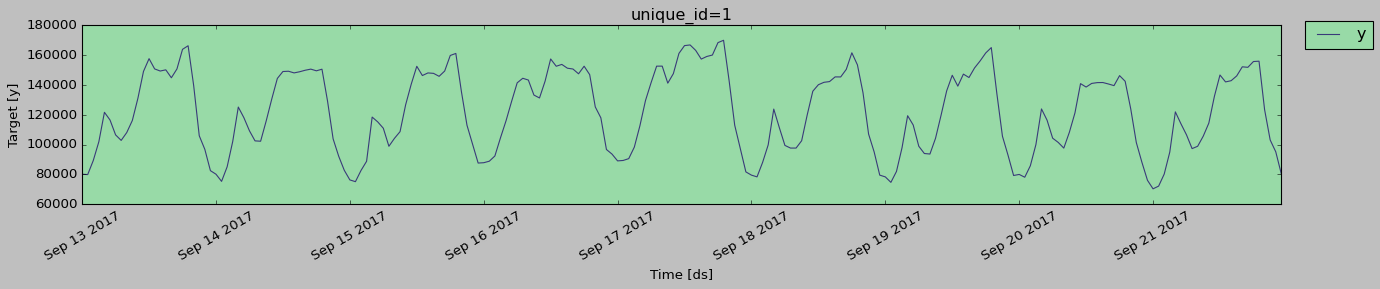

In [11]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

## **6.1 Autocorrelation plots**

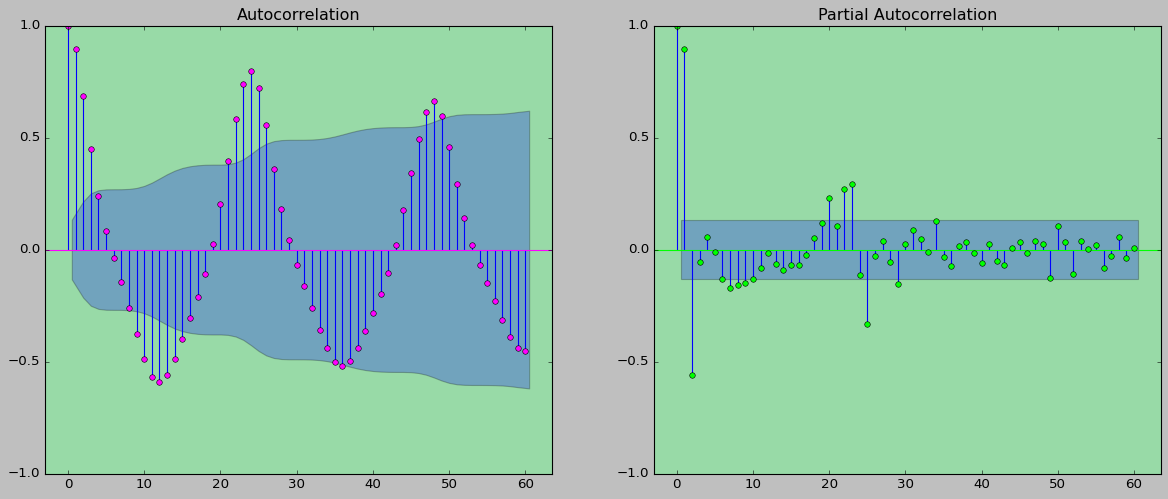

In [12]:
plt.rcParams['figure.figsize'] = (18,7)
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=60, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=60, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

#plt.savefig("Gráfico de Densidad y qq")
plt.show();

## **6.2 Seasonal plots**

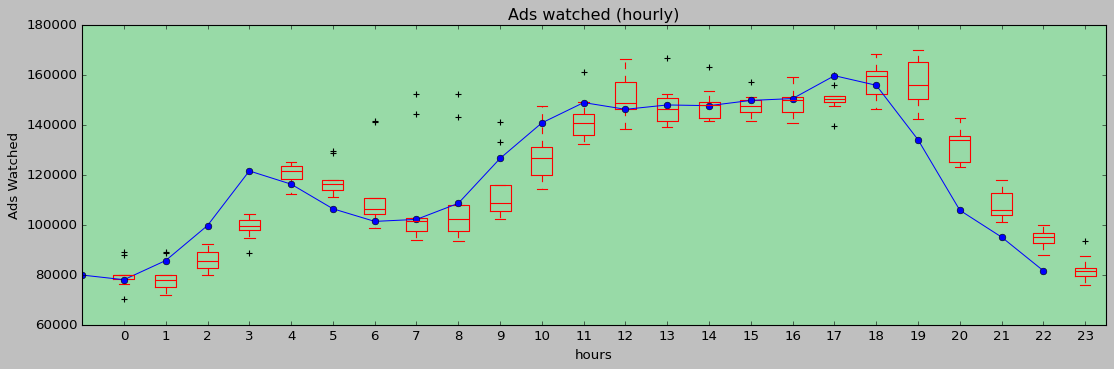

In [13]:
# Boxplot graph for hourly seasonality
# ==============================================================================
df1=df.copy()
fig, ax = plt.subplots(figsize=(16, 5))
df1['hours'] = df1['ds'].apply(lambda x: x.hour)
df1.boxplot(column="y", by='hours', ax=ax, color="red")
df1.groupby('hours')["y"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('Ads Watched')
ax.set_title('Ads watched (hourly)')
fig.suptitle('');
#plt.savefig("Gráfico de Barra")

# **7. Split the data into training and testing** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

Let's divide our data into sets
1. Data to train our `TBATS` model
2. Data to test our model

For the test data we will use the last 12 months to test and evaluate the performance of our model.

In [7]:
train = df[df.ds<='2017-09-20 17:00:00'] 
test = df[df.ds>'2017-09-20 17:00:00'] 

train.shape, test.shape

((186, 3), (30, 3))

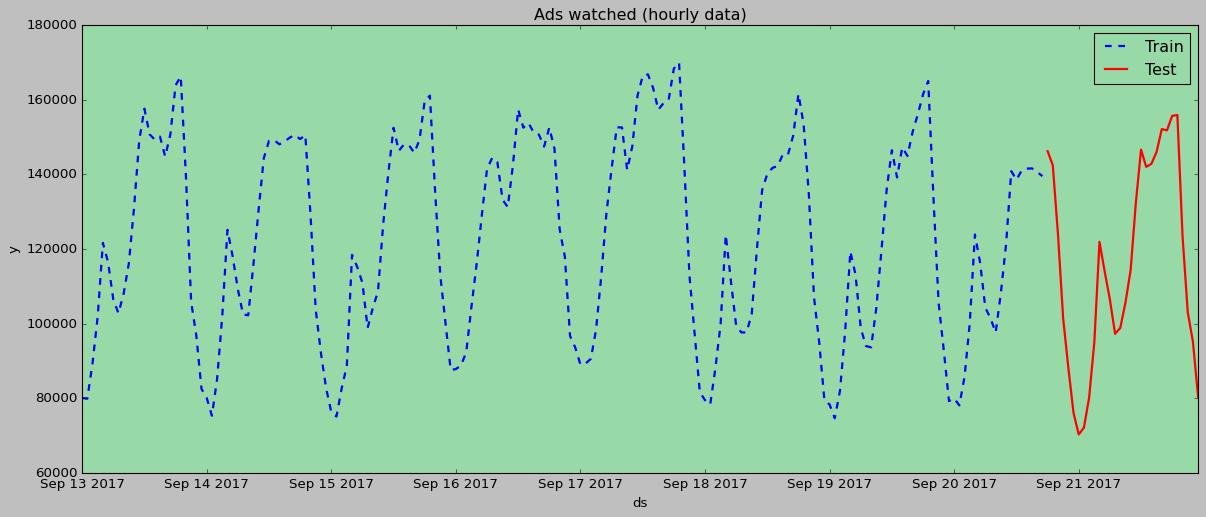

In [15]:
sns.lineplot(train,x="ds", y="y", label="Train", linestyle="--",linewidth=2)
sns.lineplot(test, x="ds", y="y", label="Test", linewidth=2, color = "red")
plt.title("Ads watched (hourly data)");
plt.show()

# **8. Modelando** <a class="anchor" id="8"></a>


## **8.1 Load libraries**

In [8]:
# Comparacion de modelos Regresion Bayesian
from sklearn.linear_model import ARDRegression, BayesianRidge, LinearRegression

## **8.2 Building Model**

In [17]:
# Creamos un diccionario con los modelos a entrenar
models = { 
    "ADR": ARDRegression(),
    "BayeRidge": BayesianRidge(),
    "lr": LinearRegression()
}

We fit the models by instantiating a new StatsForecast object with the following parameters:

models: a list of models. Select the models you want from models and import them.

* `freq:` a string indicating the frequency of the data. (See [panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).)

* `n_jobs:` n_jobs: int, number of jobs used in the parallel processing, use -1 for all cores.

* `fallback_model:` a model to be used if a model fails.

Any settings are passed into the constructor. Then you call its fit method and pass in the historical data frame.

In [9]:
# Modelo ML
# ==============================================================================
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from mlforecast.target_transforms import LocalRobustScaler, LocalStandardScaler
from mlforecast.utils import PredictionIntervals
from mlforecast.lag_transforms import ExponentiallyWeightedMean, RollingQuantile, RollingMean, RollingStd

In [19]:
mlf = MLForecast(models = models,
                 freq = 'H',
                 lags = range(1,14,1),
                 lag_transforms={
        1: [
            ExponentiallyWeightedMean(alpha=0.5),
            RollingMean(window_size=2),
            RollingMean(window_size=4),
            RollingMean(window_size=6),
            RollingMean(window_size=12),
            RollingQuantile(window_size=2, p=0.5),
            RollingQuantile(window_size=4, p=0.5),
            RollingQuantile(window_size=6, p=0.5),
            RollingStd(window_size=2),
            RollingStd(window_size=4)
        ],},
                 target_transforms=[Differences([48]),  LocalStandardScaler()], # LocalStandardScaler() LocalRobustScaler(scale='iqr')  Differences([1]),
                 #date_features=["year", "month", "day"],
                 num_threads = 32)

## **8.3 Fit the Model**

In [20]:
# fit the models
mlf.fit(train,  fitted = True, static_features= [], )

MLForecast(models=[ADR, BayeRidge, lr], freq=H, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'lag13', 'exponentially_weighted_mean_lag1_alpha0.5', 'rolling_mean_lag1_window_size2', 'rolling_mean_lag1_window_size4', 'rolling_mean_lag1_window_size6', 'rolling_mean_lag1_window_size12', 'rolling_quantile_lag1_p0.5_window_size2', 'rolling_quantile_lag1_p0.5_window_size4', 'rolling_quantile_lag1_p0.5_window_size6', 'rolling_std_lag1_window_size2', 'rolling_std_lag1_window_size4'], date_features=[], num_threads=32)

Let's see the results of our TBATS model. We can observe it with the following instruction:

In [21]:
result= mlf.fcst_fitted_values_
result

,unique_id,ds,y,ADR,BayeRidge,lr
0,1,2017-09-15 13:00:00,146275.0,146285.125000,145731.703125,145540.125000
1,1,2017-09-15 14:00:00,148020.0,147717.968750,148314.328125,150450.046875
2,1,2017-09-15 15:00:00,147735.0,150592.218750,151435.109375,153181.375000
3,1,2017-09-15 16:00:00,145750.0,141057.265625,140957.921875,139690.125000
4,1,2017-09-15 17:00:00,149285.0,150179.625000,149851.234375,149419.687500
...,...,...,...,...,...,...
120,1,2017-09-20 13:00:00,140990.0,139701.171875,139558.390625,139418.421875
121,1,2017-09-20 14:00:00,141525.0,139674.062500,140925.500000,139667.437500
122,1,2017-09-20 15:00:00,141590.0,146033.625000,146770.812500,146064.640625
123,1,2017-09-20 16:00:00,140610.0,141332.640625,141836.687500,142228.171875


In [22]:
plt.style.use('classic') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor': "#98daa7"}  # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7","#f3f3af","#c0ebe9"
plt.rcParams.update(dark_style)

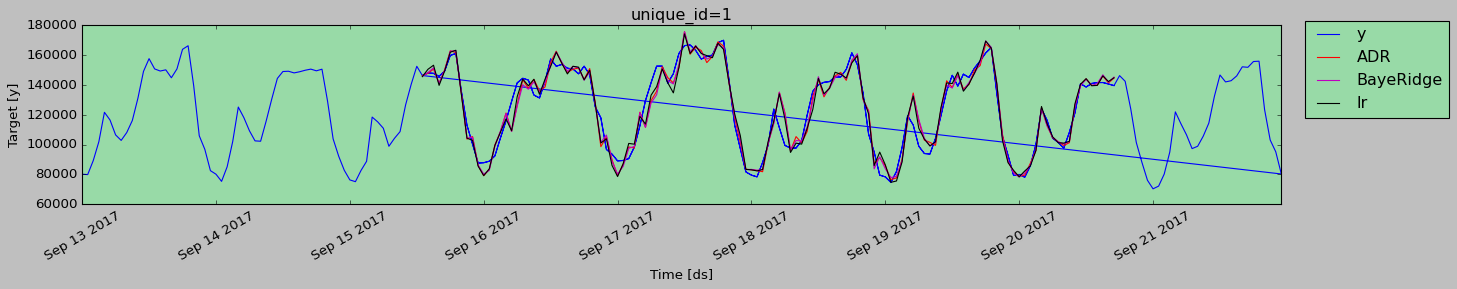

In [23]:
plot_series(df, result)

## **8.4 Predict Method**

If you want to gain speed in productive settings where you have multiple series or models we recommend using the `StatsForecast.forecast` method instead of `.fit` and `.predict`.

The main difference is that the `.forecast` doest not store the fitted values and is highly scalable in distributed environments.

The forecast method takes two arguments: forecasts next `h` (horizon) and `level`.

* `h (int):` represents the forecast h steps into the future. In this case, 12 months ahead.

* `level (list of floats):` this optional parameter is used for probabilistic forecasting. Set the level (or confidence percentile) of your prediction interval. For example, `level=[90]` means that the model expects the real value to be inside that interval 90% of the times.

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals. Depending on your computer, this step should take around 1min. (If you want to speed things up to a couple of seconds, remove the AutoModels like `ARIMA` and `Theta`)

In [24]:
forecast1 = mlf.predict(h = 30) #
forecast1.head()

,unique_id,ds,ADR,BayeRidge,lr
0,1,2017-09-20 18:00:00,152151.015625,151485.406250,152348.953125
1,1,2017-09-20 19:00:00,144736.515625,145260.750000,147157.000000
2,1,2017-09-20 20:00:00,129968.210938,131044.382812,135649.531250
3,1,2017-09-20 21:00:00,102917.734375,103714.164062,106835.476562
4,1,2017-09-20 22:00:00,91844.328125,92920.335938,95922.101562


## **Forecasting Plot**

In [25]:
plot_series(df, forecast1, max_insample_length= 100, engine= "plotly")

# **9. Evaluate the model** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


In [26]:
cv_ml4 = mlf.cross_validation(
    train,
    n_windows = 3,
    h = 30,
    static_features= [])

In [27]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape

def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [28]:
evaluate_cross_validation(cv_ml4.set_index("unique_id"), rmse)

,ADR,BayeRidge,lr,best_model
unique_id,,,,
1,18005.456461,17982.740786,18970.472742,BayeRidge


In [29]:
plot_series(df, forecast1, max_insample_length= 100, engine= "plotly",  models = ["BayeRidge"])

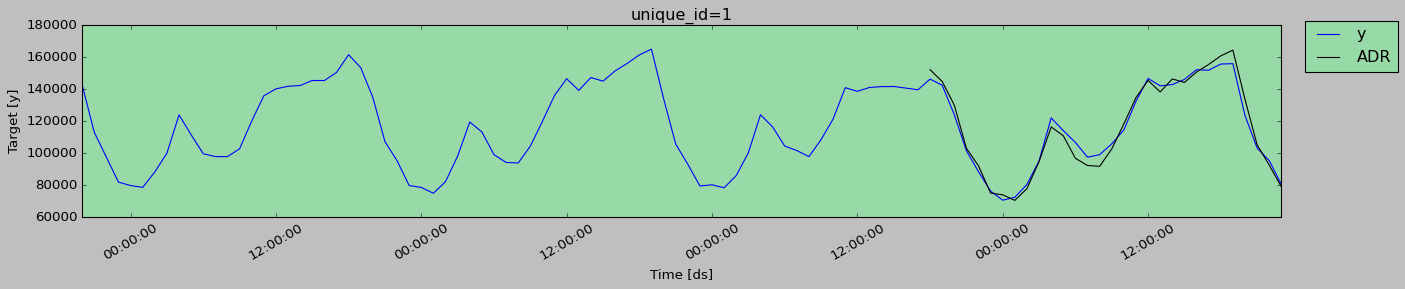

In [30]:
plot_series(df, forecast1, max_insample_length= 100,   models = ["ADR"])

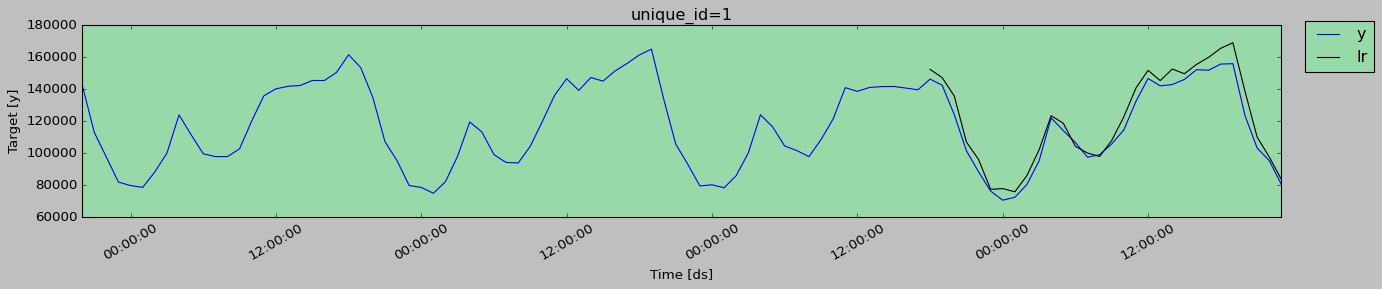

In [31]:
plot_series(df, forecast1, max_insample_length= 100,   models = ["lr"])

# Modificando el Modelo y agregando Pipeline

Agregamos un polinomio de 2do grado al modelo

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [11]:
ard_poly = make_pipeline(
    PolynomialFeatures(),
    ARDRegression(),
)
brr_poly = make_pipeline(
    PolynomialFeatures(),

    BayesianRidge(),
)


In [12]:
mlf = MLForecast(models = [ard_poly, brr_poly],
                 freq = 'H',
                 lags = range(1,14,1),
                 lag_transforms={
        1: [
            ExponentiallyWeightedMean(alpha=0.5),
            RollingMean(window_size=2),
            RollingMean(window_size=4),
            RollingMean(window_size=6),
            RollingMean(window_size=12),
            RollingQuantile(window_size=2, p=0.5),
            RollingQuantile(window_size=4, p=0.5),
            RollingQuantile(window_size=6, p=0.5),
            RollingStd(window_size=2),
            RollingStd(window_size=4)
        ],},
                 target_transforms=[Differences([48]),  LocalStandardScaler()], # LocalStandardScaler() LocalRobustScaler(scale='iqr')  Differences([1]),
                 #date_features=["year", "month", "day"],
                 num_threads = 32)

In [13]:
# fit the models
mlf.fit(train,  fitted = True, static_features= [], )

MLForecast(models=[ARDRegression, BayesianRidge], freq=H, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'lag13', 'exponentially_weighted_mean_lag1_alpha0.5', 'rolling_mean_lag1_window_size2', 'rolling_mean_lag1_window_size4', 'rolling_mean_lag1_window_size6', 'rolling_mean_lag1_window_size12', 'rolling_quantile_lag1_p0.5_window_size2', 'rolling_quantile_lag1_p0.5_window_size4', 'rolling_quantile_lag1_p0.5_window_size6', 'rolling_std_lag1_window_size2', 'rolling_std_lag1_window_size4'], date_features=[], num_threads=32)

In [14]:
forecast2 = mlf.predict(h = 30) #
forecast2.head()

,unique_id,ds,ARDRegression,BayesianRidge
0,1,2017-09-20 18:00:00,156387.593750,156098.843750
1,1,2017-09-20 19:00:00,148332.328125,150493.734375
2,1,2017-09-20 20:00:00,133464.953125,133596.531250
3,1,2017-09-20 21:00:00,104331.687500,105830.460938
4,1,2017-09-20 22:00:00,95177.929688,93949.593750


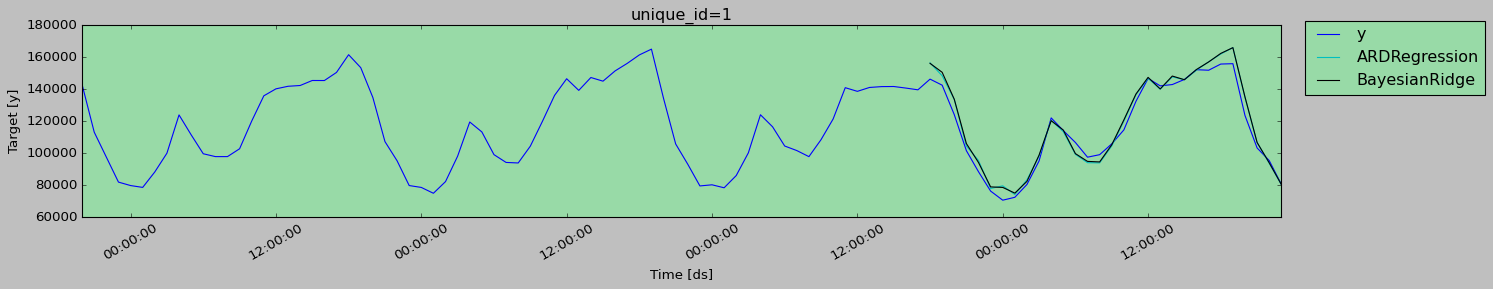

In [15]:
plot_series(df, forecast2, max_insample_length= 100, )

In [17]:
train

,ds,y,unique_id
0,2017-09-13 00:00:00,80115,1
1,2017-09-13 01:00:00,79885,1
2,2017-09-13 02:00:00,89325,1
3,2017-09-13 03:00:00,101930,1
4,2017-09-13 04:00:00,121630,1
...,...,...,...
181,2017-09-20 13:00:00,140990,1
182,2017-09-20 14:00:00,141525,1
183,2017-09-20 15:00:00,141590,1
184,2017-09-20 16:00:00,140610,1


In [ ]:
cv_ml4 = mlf.cross_validation(
    train,
    n_windows = 3,
    h = 30,
    static_features= [])

In [ ]:
evaluate_cross_validation(cv_ml4.set_index("unique_id"), rmse)

# **10. Conclusion** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

Análisis de los resultados:

Comparando los resultados obtenidos del modelo TBATS y ARIMA para el pronóstico de anuncios vistos, podemos observar las siguientes métricas de rendimiento:

1. MASE (Mean Absolute Scaled Error): El valor de MASE para el modelo TBATS es de 0.967511, mientras que para el modelo ARIMA es de 3.572169. El MASE compara el error del modelo con el error de un modelo ingenuo (como la media o el último valor observado). Un valor de MASE cercano a 1 indica que el modelo es bueno en comparación con el modelo ingenuo. En este caso, el modelo TBATS tiene un MASE más cercano a 1, lo que indica que es mejor que el modelo ARIMA en términos de precisión.

2. MAE (Mean Absolute Error): El valor de MAE para el modelo TBATS es de 7830.810938, mientras que para el modelo ARIMA es de 28912.299479. El MAE representa el promedio de las diferencias absolutas entre las predicciones y los valores reales. Un valor de MAE más bajo indica una menor discrepancia entre las predicciones y los valores reales. En este caso, el modelo TBATS tiene un MAE considerablemente más bajo en comparación con el modelo ARIMA, lo que indica una mayor precisión en las predicciones.

3. MAPE (Mean Absolute Percentage Error): El valor de MAPE para el modelo TBATS es de 6.419353, mientras que para el modelo ARIMA es de 30.988134. El MAPE representa el porcentaje promedio de error en relación con los valores reales. Un valor de MAPE más bajo indica una menor proporción de error en las predicciones. En este caso, el modelo TBATS tiene un MAPE significativamente más bajo que el modelo ARIMA, lo que indica una mejor precisión en las predicciones.

4. RMSE (Root Mean Squared Error): El valor de RMSE para el modelo TBATS es de 9716.096391, mientras que para el modelo ARIMA es de 35275.912514. El RMSE representa la raíz cuadrada del promedio de los errores al cuadrado. Un valor de RMSE más bajo indica una menor dispersión de los errores y, por lo tanto, una mayor precisión en las predicciones. En este caso, el modelo TBATS tiene un RMSE considerablemente más bajo en comparación con el modelo ARIMA, lo que indica una mayor precisión en las predicciones.

5. SMAPE (Symmetric Mean Absolute Percentage Error): El valor de SMAPE para el modelo TBATS es de 6.716095, mientras que para el modelo ARIMA es de 24.641293. El SMAPE representa el promedio de las diferencias porcentuales absolutas entre las predicciones y los valores reales. Un valor de SMAPE más bajo indica una menor proporción de error en las predicciones. En este caso, el modelo TBATS tiene un SMAPE significativamente más bajo que el modelo ARIMA, lo que indica una mejor precisión en las predicciones.

En general, al analizar todas las métricas de rendimiento, podemos concluir que el modelo TBATS supera al modelo ARIMA en términos de precisión en el pronóstico de anuncios vistos. El modelo TBATS muestra valores más bajos de MASE, MAE, MAPE, RMSE y SMAPE, lo que indica una mayor precisión y menor error en las predicciones. Por lo tanto, se recomendaría utilizar el modelo TBATS para el pronóstico de anuncios vistos basado en estos resultados.

# **11. References** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

1. Changquan Huang • Alla Petukhina. Springer series (2022). Applied Time Series Analysis and Forecasting with Python. 
2. Ivan Svetunkov. [Forecasting and Analytics with the Augmented Dynamic Adaptive Model (ADAM)](https://openforecast.org/adam/)
3. [James D. Hamilton. Time Series Analysis Princeton University Press, Princeton, New Jersey, 1st Edition, 1994.](https://press.princeton.edu/books/hardcover/9780691042893/time-series-analysis)
4. [Nixtla Parameters Arima](https://nixtlaverse.nixtla.io/statsforecast/src/core/models.html#arima).
5. [Model Arima](https://nixtlaverse.nixtla.io/statsforecast/docs/models/arima.html)
6. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
7. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
8. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).